# Using Predictive Modeling to Get More 5-Star Airbnb Reviews
- Prepared by: Jonathan Holt, Data Scientist

## <b> Business Problem </b>

Oceanside Property Management is a property management company located in San Diego California. Their main business is managing rental properties. However, they have recently noticed that a lot of Airbnb hosts have been reaching out to them for guidance. These hosts are mostly uninterested in having OPM manage their rentals, however they wany some help in increasing their success as Airbnb hosts.

There have been so many Airbnb hosts reaching out that OPM has decided that this can be a good side-business for them. So they plan to officially addmairbnb consulting as a service that they provide. In their initial research they found that the top questions that potential clients who wish to utlize this service are:
- <b>"What can I do to get more 5 star ratings?"</b>
- <b>"Can you help me reach Superhost status? (or maintain Superhost status)</b>


These questions are understandable because Airbnb puts a huge focus on getting 5 star overall ratings. They also highly publicize the benefits of getting (and maintaining) Superhost status.

Oceanside Property Management has decided that the main focus of their service will be helping clients get more 5 star reviews. Therefore they have tasked me with providing the following: 
- 1) <b>A model</b> that will predict whether a specific rental unit should get a 5 Star Overall score based on other available information.
- 2) <b>An industry analysis of AirBnb in San Diego.</b> Specifically looking for any insight that they can give to their clients that will give them a leg up on people who don't use their consulting service.

They also want me to answer the following questions:
- 1) Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)
- 2)How do we determine whether a Host "should" be getting 5 Star reviews?
- 3) What factors are most important in determining a 5 Star Overall Rating? (what aspects should they most focus on)

And finally, they want to know where their consulting service can make the most impact, so they know which features to market and/or which hosts to market to.

## <b>Understanding AirBnb</b>

### Who uses AirBnb?

information from: https://listwithclever.com/research/airbnb-vs-hotels-study/#sources, accessed 6/21/22

- Initially, the idea of staying in a random person’s home was viewed as absurd and dangerous, but public perception of peer-to-peer (P2P) vacation rentals has shifted significantly in recent years.
- A 2016 Goldman Sachs study found that,<b>“If people have stayed in peer-to-peer lodging in the last five years, the likelihood that they prefer traditional hotels is halved (79 percent vs. 40 percent).” </b>
- Airbnb is becoming the preferred choice of vacationers — <b>60% of travelers who use both Airbnb and hotels prefer Airbnb over comparable hotels when going on vacation </b>
- 68% of business travelers prefer staying in hotels when traveling for work, and they're more likely to have a negative experience at an Airbnb

information from: https://www.torontomu.ca/news-events/news/2016/10/why-tourists-choose-airbnb-over-hotels/ accessed 6/21/22

David Guttentag, professor at the Ted Rogers School of Hospitality and Tourism Management, identifies five types of Airbnb guests based on his 2016 study:

- Money savers: Choose Airbnb because of <b>affordability</b>
- Home seekers: Interested in <b>household amenities and larger spaces</b>
- Collaborative consumers: Motivated by the share economy philosophy and the ability to have an authentic experience
- Pragmatic novelty seekers: While not regular Airbnb users, these travelers are drawn to the novelty of Airbnb
- Interactive novelty seekers: Want to interact with their host or other locals


### Importance of 5 Star Reviews and Rating

AirBnb focuses on exceeding customer expectations, which is why they strictly require that hosts maintain a near perfect rating in order to remain on the service.

### Importance of Superhost
- information from https://www.airbnb.com/d/superhost. Accessed 6/16/22

<b>Advantages: </b>
- Superhost badge to stand out among other hosts.
- Customers can filter search results to show only superhosts.

<b>Requirements:</b>
- Minimum 4.8 overall rating.
- 10 stays over the last year.
- < 1% Cancellation Rate.
- At least 90% Response Rate.
- Reassessed every 3 months.

### Problems with Airbnb Data and/or Ratings System

The review data is incredibly skewed because Airbnb requires such a high rating. <b>Even though there is a 5 point scale, Anything lower than a 4.8 is seen as "bad".</b>
- So while this is technically a 5pt scale (as a reviewer can give 1 - 5 stars, with no partial stars allowed), getting a 4.0 average could result in being de-listed from the service!

In order to stay at a 4.8 overall rating:
- a host will need to have <b>four</b> 5-star reviews to offset a single 4-star review.
- a host will need to have <b>ten</b> 5-star reviews to offset a single 3-star review.

The major problem with this review system is that <b>airbnb guests often assume that airbnb's review scale functions similarly to a hotel review scale, which also uses 5 stars</b>, with 3 considered average, 4 above average, and 5 star being the best possible experience.

from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe
- <i>The problem stems from the fundamental difference in what most people think a 5-star rating system is, and what AirBnB’s system actually is. The vast majority of people think that a 4-star review is perfectly appropriate; Their stay was good, they enjoyed themselves, but your place wasn’t the Vanderbilt Suite at the Plaza. What they don’t understand is that if a listing gets too many 4-star reviews the AirBnB platform begins to send warnings to hosts that their listing will be removed.</i>

## <b>My Process</b>

### The Problem

The big concern that Airbnb Hosts haveis <b>how to ensure 5-Star Overall reviews</b>. While the other review categories certainly factor into a guest's review of a property, the Overall rating itself doesn't factor anything else in. It is just purely what the guest put in for Overall Rating. <b>"How to get more 5 Star Reviews" is the problem that I'm seeking to solve.</b>

### What I'm Looking For:

I have been tasked with creating a model that will predict whether or not a unit will generate 5-star reviews. The best way to find this is <b>create a classification </b> for whether a unit has a perfect 5.0 overall rating, <b>and then train a model to predict whether a unit will get that classification or not</b>.

<b>Target: Elite Units</b>
- I am calling my target classification <b>Elite Units.</b>
- An Elite Unit is any Rental Unit that has a 4.9 - 5.0 Overall Rating.
- I am including 4.9 so there is a tiny bit of wiggle room, especially as a 4.9 overall rental unit would be seen as "successful" in Airbnb's eyes.
- These are the high-performing units that OPM clients want to emulate. Creating this classifier makes it easier to determine if they are performing on target, as well as letting us analyze any common trends, etc.

<b>Measuring Success: Booking Rate</b>
- At first glance, you might assume that Price would be the best performance metric. However, price is relative. A low priced 5 bedroom house will often cost more than a high priced 1 bedroom house.
- However, <b>all Airbnb Hosts desire bookings. The more that their unit is booked, the more success that they have.</b>
- Therefore, Booking Rate will be the feature that I use to measure how successful a unit is.
- <b>Any features that cause a positive Trend in Booking Rate will be seen as successful.</b>

### Goals for my Model:

<b><u>What I will be looking for in my models:</b></u>
- 1. <b>High Precision Score:</b> I want to make sure that I am identifying as many airbnb units that meet my target criteria as possible. I will keep this in balance by checking F1 Score.
- 2. <b>Good F1 Score:</b> While I am ultimately not concerned with Recall , a good F1 score means that the model is performing well on both Recall and Precision. Since Recall and Precision are inverses of each other, a good F1 score ensures that the model isn't skewed too far toward one or the other. (ie, a model that predicts EVERY customer is within my target would have perfect Recall, but would be useless).
- 3. <b>High Cross Validation Score:</b> This ensures that the model isn't overly trained on the test data and that it does a good job of predicted unseen and unknown data. (ie, the test set).
- 4. <b>Area Under the Curve (AUC):</b> The ROC AUC Score measures the Area under the ROC curve, which means that it classifies the true positive rate against the false positive rate. The higher the score, the better performing the model is. 

<b><u>That said, here is the scale that I will use to evaluate my models:</b></u>

- <b>.69 or less:</b> Model performs only slightly better than guessing and is worthless for my analysis.
- <b>.70 - .79:</b> Model still isn't performing very well, but is at minimum acceptable levels.
- <b>.80 - .89:</b> Model is performing fairly well. My goal is to be in this range or better.
- <b>.90 - .99:</b> Model is performing very well. I would be very happy to have a final model in this range.

## <b> Preprocessing </b>

### Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pylab import rcParams
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
import numpy as np

pd.set_option('display.max_rows', 1000)
plt.style.use('fivethirtyeight')

### Full_df: Dataframe Containing All Available Columns

In [2]:
#Data obtained from http://insideairbnb.com/san-diego
full_df = pd.read_csv('data/listings.csv.gz')

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10935 non-null  int64  
 1   listing_url                                   10935 non-null  object 
 2   scrape_id                                     10935 non-null  int64  
 3   last_scraped                                  10935 non-null  object 
 4   name                                          10935 non-null  object 
 5   description                                   10809 non-null  object 
 6   neighborhood_overview                         7440 non-null   object 
 7   picture_url                                   10935 non-null  object 
 8   host_id                                       10935 non-null  int64  
 9   host_url                                      10935 non-null 

###  Base DF
- I am slicing out the columns that I think will be most useful for analyzing and modeling the data, to make the dataframe more manageable.

In [4]:
base_df = full_df[['price', 'review_scores_rating', 'review_scores_accuracy',
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                      'review_scores_location', 'review_scores_value','accommodates', 'bedrooms', 'beds',
                      'instant_bookable', 'property_type', 'room_type', 'amenities', 'availability_365', 
                      'availability_30','availability_90','host_id', 'calculated_host_listings_count', 
                      'host_response_time', 'host_response_rate','host_is_superhost']]

In [5]:
df = base_df

## <b> Exploratory Data Analysis </b>
- Investigating the various features of my dataset to determine which features to use in my model and analysis, and to what extent.

### Fixing Price
- Price is currently a string. I need to strip out the extra characters and convert the datatype to Float so that I can better utilize the data.

In [6]:
df['price'].head(2)

0     $60.00
1    $282.00
Name: price, dtype: object

In [7]:
#using lambda function to strip $ and , out of each price record. Replacing with blank space.
df['price'] = df['price'].map(lambda x: x.replace('$',' '))
df['price'] = df['price'].map(lambda x: x.replace(',',''))
df['price'] = df['price'].astype(float) #changing cleaned column to float
df['price'].head(2)

0     60.0
1    282.0
Name: price, dtype: float64

### New Feature: Host Listings_5-
- Creating a new feature that classifies whether a "many" listings or not.

In [8]:
#getting key metrics for this feature.
df['calculated_host_listings_count'].describe()

count    10935.000000
mean        18.456607
std         39.761546
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max        219.000000
Name: calculated_host_listings_count, dtype: float64

<b>Analysis:</b>
- The majority of hosts in this dataset have between 1-14 listings. (25%-75%).
- The Median is 3.
- One has 219 listings.

In [9]:
#checking to see how many records have only 1 or 2 listings vs the rest of the records.
low_listings = df['calculated_host_listings_count'] <= 2
low_listings.value_counts()

False    5899
True     5036
Name: calculated_host_listings_count, dtype: int64

Since so many hosts have just 1 or 2 rental units, everything is skewed toward the lower end. However, I am setting this classifier at 5 and under as people with multiple listings will be more likely to use OPM's service.

In [10]:
df['host_listings_5-'] =df['calculated_host_listings_count'] <= 5
df['host_listings_5-'].value_counts()

True     6802
False    4133
Name: host_listings_5-, dtype: int64

### New Feature: Capacity_5+

In [11]:
#getting key metrics for this feature.
df['accommodates'].describe()

count    10935.000000
mean         4.818930
std          3.139456
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: accommodates, dtype: float64

<b>Analysis:</b>
- Mean and Median are roughly 4 people, so I will set the classifier at 5 and above.
- Since a "family" unit would accommodate 4 or less,this will help determine whether the rental units are hotel room sized (2 or 4 people), or larger.

In [12]:
#creating classifier and checking to see how the data is split.
df['capacity_5+'] = df['accommodates'] >=5
df['capacity_5+'].value_counts()

False    6386
True     4549
Name: capacity_5+, dtype: int64

This seems to be a good classifier as the split ends up being close to 50%.

### New Feature: Bedrooms_2+

In [13]:
#getting key metrics for this feature.
df['bedrooms'].describe()

count    9905.000000
mean        1.969611
std         1.217462
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: bedrooms, dtype: float64

<b> Analysis: </b>
- Mean and Median are both roughly 2 Bedrooms, so I will set the classifer at 2 and above.

In [14]:
#creating classifier and checking to see how the data is split.
df['bedrooms_2+'] = df['bedrooms'] >= 2
df['bedrooms_2+'].value_counts()

False    5651
True     5284
Name: bedrooms_2+, dtype: int64

### New Feature: Booking Rates
- seeing the number of available days is good, but in some cases it may be more helpful to see this at a percentage.

In [15]:
#Changing availability to a percentage named availability rate.
df['availability_30_rate'] = df['availability_30'].apply(lambda x: x / 30) 
df['availability_90_rate'] = df['availability_90'].apply(lambda x: x / 90)

In [16]:
#Changing the availabilty rate to the percentage of the time period that the unit is booked.
df['booked_rate_30'] =  df['availability_30_rate'].apply(lambda x: 1 - x)
df['booked_rate_90'] =  df['availability_90_rate'].apply(lambda x: 1 - x)


In [17]:
availability = df[['availability_30_rate', 'booked_rate_30', 'availability_90_rate', 'booked_rate_90']]
availability.head()

,availability_30_rate,booked_rate_30,availability_90_rate,booked_rate_90
0,0.000000,1.000000,0.566667,0.433333
1,0.400000,0.600000,0.700000,0.300000
2,0.166667,0.833333,0.055556,0.944444
3,0.333333,0.666667,0.588889,0.411111
4,0.833333,0.166667,0.944444,0.055556


### New Feature: Bookings Above Average
- I have determined that price is not a great metric for measuring rentals because the prices are relative, and no two units are exactly the same.
- However, the main thing that hosts want is to maximimze their bookings. So I want to capture and analyze how much availabilty they have so I that I have a metric to compare across the board.

In [18]:
df['bookings_above_avg'] = df['booked_rate_90'] >=.512
df['bookings_above_avg'].value_counts()

True     5476
False    5459
Name: bookings_above_avg, dtype: int64

### New Feature: Host Response Rate 100
- Feature that determines whether a host has a perfect response rate.
- SuperHost status requires a minimum of 90% repsonse rate.

In [19]:
#creating a classifier that captures whether a host has a perfect response rate or not.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', ' ')
df['host_response_rate']  = df['host_response_rate'].astype('float')
df['host_response_100'] = df['host_response_rate'] == 100.0
df['host_response_100'].value_counts()

True     7229
False    3706
Name: host_response_100, dtype: int64

### Fixing Host is Superhost & Instant Bookable

Features are currently strings instead of bools.

In [20]:
#setting up up a bool based on the old string data.
df['superhost'] = df['host_is_superhost'] == 't'
df['instant_bookable'] = df['instant_bookable'] == 't'

In [21]:
#making sure that I captured both the True and False classifications.
df['superhost'].value_counts()

False    6095
True     4840
Name: superhost, dtype: int64

In [22]:
#making sure that I captured both the True and False classifications.
df['instant_bookable'].value_counts()

False    5912
True     5023
Name: instant_bookable, dtype: int64

### <b>Target Feature: Elite Units </u>
- this is my target feature. It classifies whether a unit is in our target 4.9 - 5.0 overall rating range or not.

#### Dealing with Nulls

In [23]:
#seeing how many records don't have a review score overall rating.
df['review_scores_rating'].isna().sum()

1527

There are 1527 Null records that need to be dealt with. If I drop them, I will lose 14% of my data.

In [24]:
nulls = df[df['review_scores_rating'].isna()]

In [25]:
#double checking to make sure my variable captured all of the null records.
len(nulls)

1527

In [26]:
#seeing what the records without review scores look like.
nulls.head(3)

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms,...,host_listings_5-,capacity_5+,bedrooms_2+,availability_30_rate,availability_90_rate,booked_rate_30,booked_rate_90,bookings_above_avg,host_response_100,superhost
12,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4.0,...,True,True,True,0.700000,0.900000,0.300000,0.100000,False,False,False
23,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1.0,...,False,False,False,0.533333,0.844444,0.466667,0.155556,False,False,False
70,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,...,True,False,False,1.000000,1.000000,0.000000,0.000000,False,True,False


nulls appear to have no ratings. Let's drop them for now.

In [27]:
#dropping these records as I need review score data for my classifier to work.
df.dropna(subset=['review_scores_rating'], how='all', inplace=True)

In [28]:
#checking how many records are left after dropping the nulls.
len(df)

9408

<b> 9408 Records are left after dropping null values </b>

#### Creating Elite Unit Classifier
- I have decided to classify "5 Star" units as ones that have a 4.9 or higher overall rating.
- 4.9 is still an incredibly high score, and is above thresholds for success (4.8 rating, etc), so it is well worth capturing units with a 4.9 Rating as high performers as well.

In [29]:
#creating classifier and then checking to see how many units are in each category.
df['elite'] = df['review_scores_rating'] >= 4.9
df['elite'].value_counts()

False    5527
True     3881
Name: elite, dtype: int64

#### <b> 42.2% of my dataset are Elite Units</b>
Out of 9,408 Airbnb rental units, 42.2% (3881) are elite units, while 58.7% (5527) are not.

### Room Type

In [30]:
#checking to see how many records I have of each room type.
df['room_type'].value_counts()

Entire home/apt    7816
Private room       1522
Shared room          64
Hotel room            6
Name: room_type, dtype: int64

Analysis: There are very few records that are either Shared Rooms or Hotel rooms. They can also easily be combined with Shared Room and leave me with a binary classifier, which will be much more effective.

In [31]:
#creating a new feature which turn room type into a binary classifier.
df['entire_home'] = df['room_type'] == 'Entire home/apt'
df['entire_home'].value_counts()

True     7816
False    1592
Name: entire_home, dtype: int64

In [32]:
#dropping room_type since I now have a classifier in it's place.
df.drop(['room_type'], axis=1, inplace=True)

### Host Response Time

In [33]:
#checking to see how many records I have of each response speed.
df['host_response_time'].value_counts()

within an hour        7022
within a few hours    1115
within a day           477
a few days or more     166
Name: host_response_time, dtype: int64

In [34]:
#The majority of responses were "within an hour".
# I will change this into a binary classifier
df['response_within_hour'] = df['host_response_time'] == 'within an hour'
df['response_within_hour'].value_counts()

True     7022
False    2386
Name: response_within_hour, dtype: int64

In [35]:
#dropping host_response_time since I now have a classifier in it's place.
df.drop(['host_response_time'], axis=1, inplace=True)

### Creating Review Metric Classifier Columns
- these columns will capture the number of 5 Star reviews left for each review metric.
- Just like with my target classifer (5-Star), I am counting counting 4.9s in with the 5.0s. 

In [36]:
#Creating a classifier for each review metric with the same critieria as my target. (4.9 - 5.0 Scores)
df['accuracy_5'] = df['review_scores_accuracy'] >= 4.9
df['cleanliness_5'] = df['review_scores_cleanliness'] >= 4.9
df['checkin_5'] = df['review_scores_checkin'] >= 4.9
df['location_5'] = df['review_scores_location'] >= 4.9
df['value_5'] = df['review_scores_value'] >=4.9
df['communication_5'] = df['review_scores_communication'] >= 4.9

In [37]:
#Printing a list with the number of units that are Elite in each category.
print("Number of Elite Accuracy Units:", len(df[df['accuracy_5']== True]))
print("Number of Elite Cleanliness Units:", len(df[df['cleanliness_5']== True]))
print("Number of Elite Checkin Units:", len(df[df['checkin_5']== True]))
print("Number of Elite Location Units:", len(df[df['location_5']== True]))
print("Number of Elite Value Units:", len(df[df['value_5']== True]))
print("Number of Elite Communication Units:", len(df[df['communication_5']== True]))

Number of Elite Accuracy Units: 4764
Number of Elite Cleanliness Units: 4088
Number of Elite Checkin Units: 6507
Number of Elite Location Units: 5468
Number of Elite Value Units: 2508
Number of Elite Communication Units: 6227


There are significantly less units that have Elite Value. I am going to do a value count of that classifier to take a closer look.

In [38]:
#checking values of the elite accuracy classifier.
df['value_5'].value_counts()

False    6900
True     2508
Name: value_5, dtype: int64

### New Feature: Price Above Median 

In [39]:
#checking the mean, standard deviation, median, and quartiles of price.
df['price'].describe()

count     9408.000000
mean       279.206845
std        335.787832
min         10.000000
25%        115.000000
50%        179.000000
75%        326.000000
max      10000.000000
Name: price, dtype: float64

It is difficult to analyze price because it is relative. That said, I will create a classifier to determine whether a unit is above or below the average (mean) price. (I rounded the mean of 279 to 280)

In [40]:
#creating classifier for prices above mean
df['price_280+'] = df['price'] >= 280

In [41]:
#checking values for the new classifier.
df['price_280+'].value_counts()

False    6508
True     2900
Name: price_280+, dtype: int64

### Creating Analysis_df

In [42]:
#copying my dataframe as 'analysis_df' so I can easily pull back up my df with all classifiers in place.
analysis_df = df.copy()

## <b>Preparing for Modeling</b>

In [43]:
#checking to see what my dataframe currently looks like.
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9408 entries, 0 to 10934
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           9408 non-null   float64
 1   review_scores_rating            9408 non-null   float64
 2   review_scores_accuracy          9385 non-null   float64
 3   review_scores_cleanliness       9385 non-null   float64
 4   review_scores_checkin           9383 non-null   float64
 5   review_scores_communication     9385 non-null   float64
 6   review_scores_location          9383 non-null   float64
 7   review_scores_value             9383 non-null   float64
 8   accommodates                    9408 non-null   int64  
 9   bedrooms                        8476 non-null   float64
 10  beds                            9317 non-null   float64
 11  instant_bookable                9408 non-null   bool   
 12  property_type                   9

### One Hot Encoding

In [44]:
#creating a variable which captures the features that need to be one hot encoded.
need_to_encode = df[['price_280+', 'elite', 'accuracy_5', 'cleanliness_5', 'checkin_5', 'location_5', 'value_5',
                     'communication_5', 'entire_home', 'bedrooms_2+',
                     'bookings_above_avg', 'instant_bookable', 'capacity_5+', 
                     'host_listings_5-', 'superhost', 'host_response_100', 'response_within_hour']]

#calling encoder and fitting it to the features that need to be encoded.                    
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

#transforming the encoder output so that it can be modeled.
ohe_1 = ohe.transform(need_to_encode).toarray()

#adding labels
ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head(2)

,price_280+_False,price_280+_True,elite_False,elite_True,accuracy_5_False,accuracy_5_True,cleanliness_5_False,cleanliness_5_True,checkin_5_False,checkin_5_True,...,capacity_5+_False,capacity_5+_True,host_listings_5-_False,host_listings_5-_True,superhost_False,superhost_True,host_response_100_False,host_response_100_True,response_within_hour_False,response_within_hour_True
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [46]:
#creating 'cleaned_df' as a copy of 'ohe_df' so that I have a saved version of the df up to this point.
cleaned_df = ohe_df.copy()

#### Dropping One Value for Categoricals

In [47]:
#dropping one value from all categorical values to prevent redundancy.
cleaned_df.drop(['elite_False', 'accuracy_5_False', 'cleanliness_5_False', 'checkin_5_False', 'location_5_False',
                 'value_5_False', 'communication_5_False', 'bedrooms_2+_False',
                 'bookings_above_avg_False', 'instant_bookable_False', 'capacity_5+_False', 
                 'host_listings_5-_False', 'entire_home_False', 'price_280+_False',
                 'superhost_False', 'host_response_100_False', 'response_within_hour_False',
                ], axis=1, inplace=True)

#### Dealing with Class Imbalance

- <b> Solution </b>
    - Always use class weight parameter in Decision Tree Classifier
    - Always stratify Train Test Split.
    - Add SMOTE to Training Sets.

In [48]:
#checking to make sure that my target was properly encoded.
cleaned_df['elite_True'].value_counts()

0.0    5527
1.0    3881
Name: elite_True, dtype: int64

### <b>Train Test Split</b>
- Creating seperate Training and Test Groups for Modeling.

In [50]:
#creating 'balanced_df', which will end up being my df with balanced data
balanced_df = cleaned_df.copy()

#islolating my target(y), and all other data(X)
X = balanced_df.drop(['elite_True'], axis=1)
y = balanced_df['elite_True']

#Splitting X and y into training and test sets, with 25% of the data in the test set.
#Stratifying the split to minimize class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)

#Using SMOTE to further minimize any class imbalance.
smote = SMOTE(random_state=23)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 

### Choosing Evaluation Metrics
- My goal is to predict whether a person will get a 4.9-5.0 Airbnb Overall rating.
- Which is worse?
    - Model predicts that a unit is an Elite Unit, but they actually aren't? (more false Positives)
    - Model predicts that someone is NOT an Elite Unit but they actually are? (more false negatives)

<b> Decision </b>
- I want false Positives to be as low as possible.
- If my model says that a property is an Elite Unit, I want it to be true.
- If it misses some of the Elite units in the process, that is fine.
- <b>Therefore, I am most concerned with Precision, balanced out by F1 score.</b>

#### Metrics Function

In [51]:
#creating 'get_metrics' function
def get_metrics(clf, y_pred):
    
    """Function that calculates the key metrics that I want to analyze for my models. It also leaves out
    unneccesary evaluation metrics that I don't need to see."""
    
    clf_prec = precision_score(y_test, y_pred) * 100
    print('Precision is :{0}'.format(clf_prec))
    clf_f1 = f1_score(y_test, y_pred) * 100
    print('F1 Score is :{0}'.format(clf_f1))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    clf_roc_auc = auc(false_positive_rate, true_positive_rate)
    print('ROC AUC is :{0}'.format(round(clf_roc_auc, 2)))
    clf_cv_score = np.mean(cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10))
    print('Cross Validation Score is :{0}'.format(round(clf_cv_score, 3)))

## <b>Modeling</b>

### <u>Baseline Decision Tree </u>

In [52]:
#Starting with a basic decision tree. Making sure that class weights are balanced.
dt1 = DecisionTreeClassifier(random_state=23, class_weight="balanced")
dt1.fit(X_train_resampled, y_train_resampled)
dt1_y_pred = dt1.predict(X_test)
get_metrics(dt1, dt1_y_pred)

Precision is :78.49017580144778
F1 Score is :78.36861125451729
ROC AUC is :0.82
Cross Validation Score is :0.849


#### Baseline Model Analysis: 
- A simple decision tree gives me a good starting point. The precision is is above 78%, which is acceptable, as is the F1 Score.
- The AUC Score is already at .82, which is great for baseline!
- Likewise, the Cross Validation score is already looking good as it is nearly .85.

### <u>Decision Tree 2 </u>

#### Refining Decision Tree through GridSearchCV

In [53]:
#creating a GridSearch which will optimize the parameters of my decision tree.
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [54]:
# Instantiate GridSearchCV
dt2 = DecisionTreeClassifier(random_state=23)

#Running Gridsearch on my data. Making sure that it is optimizing Precision as that is my key metric.
dt_grid_search = GridSearchCV(dt2, dt_param_grid, cv=3, scoring = 'precision')

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [55]:
#running the decision tree again. This time using the parameters as determined from the grid search.
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2,
                             min_samples_leaf=1, class_weight='balanced', random_state=23)
dt2.fit(X_train_resampled, y_train_resampled)
dt2_y_pred = dt2.predict(X_test)
get_metrics(dt2, dt2_y_pred)

Precision is :82.89334741288279
F1 Score is :81.89880020865937
ROC AUC is :0.85
Cross Validation Score is :0.849


Analysis:
- All scores are improved!
- Everything is in the 80s which is excellent!
- I would be happy with this as a final model, but want to see if I can further improve my results with ensemble methods or gradient boosting.

### <u>Random Forests </u>

In [56]:
#Creating a Random Forests Classifier.
rf1_clf = RandomForestClassifier(random_state=23, class_weight="balanced")
rf1_clf.fit(X_train_resampled, y_train_resampled)
rf1_y_pred = rf1_clf.predict(X_test)
get_metrics(rf1_clf, rf1_y_pred)

Precision is :79.06976744186046
F1 Score is :79.836651352731
ROC AUC is :0.83
Cross Validation Score is :0.861


Analysis:
- This is an improvement over my baseline model. But it still isn't as good as my Optimized Decision Tree.

### <u>Random Forests 2</u>

#### GridSearch CV

In [57]:
#Creating Grid Search to optimize Random Forest Parameters for Precision.
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [58]:
#Running GridSearch on my Random Forests Model to get the optimal parameters.
rf2_clf = RandomForestClassifier(random_state=23)


rf1_grid_search= GridSearchCV(rf2_clf, rf_param_grid, scoring = 'precision', cv=3)
rf1_grid_search.fit(X_train_resampled, y_train_resampled)

print("")
print(f"Random Forest  Optimal Parameters: {rf1_grid_search.best_params_}")


Random Forest  Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}


In [59]:
#running Model again with parameters set to the values from the grid search.
rf2_clf = RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 3,
                                min_samples_split= 10, n_estimators= 30, random_state=23,
                                class_weight='balanced')
rf2_clf.fit(X_train_resampled, y_train_resampled)
rf2_y_pred = rf2_clf.predict(X_test)
get_metrics(rf2_clf, rf2_y_pred)

Precision is :80.8300395256917
F1 Score is :82.54288597376387
ROC AUC is :0.85
Cross Validation Score is :0.869


Analysis:
- This model is better than Baseline Decision Tree and Baseline Random Forests.
- It has a slightly better F1 Score and Cross Validation score than Decision Tree 2, however Decision Tree 2 still has a higher precision score, which is my main metric for determining my final model.

### <u>Gradient Boosting (XGBoost) Model</u>

In [60]:
# Instantiate XGBClassifier to start a gradient boosting model
clf = XGBClassifier(random_state=23)

# Fit XGBClassifier
xg1 = clf.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
xg1_y_pred = clf.predict(X_test)
get_metrics(xg1, xg1_y_pred)

Precision is :79.77867203219316
F1 Score is :80.75356415478615
ROC AUC is :0.84
Cross Validation Score is :0.869


#### GridSearch

In [62]:
# setting up grid search
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

### <u>XGBoost 2</u>

In [63]:
#running Gridsearch on Gradient Boosted model to find optimal parameters
xg2 = XGBClassifier(random_state=23)

grid_clf = GridSearchCV(xg2, boost_param_grid, scoring='precision', cv=3, n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5


In [64]:
xg2 = XGBClassifier(learning_rate= 0.1, max_depth=6, min_child_weight=1,
                                n_estimators=100, subsample=0.5, random_state=23)
xg2.fit(X_train_resampled, y_train_resampled)
xg2_y_pred = xg2.predict(X_test)
get_metrics(xg2, xg2_y_pred)

Precision is :81.14343029087262
F1 Score is :82.25724453482461
ROC AUC is :0.85
Cross Validation Score is :0.871


Analysis:
- Improves all scores from both baseline decision tree as well as baseline boosted model.
- Scores all are comparable to the Optimized Decision Tree.

## <b>Model Selection</b>

### <b>Final Model: Optimized Decision Tree (Decision Tree 2)</b>
- The advantages of the Optimized Boosted Model (F1 Score and Cross Validation) aren't significant enough to cancel out the slight edge that the Optimized Decision Tree has in Precision.

### Final Model Confusion Matrix

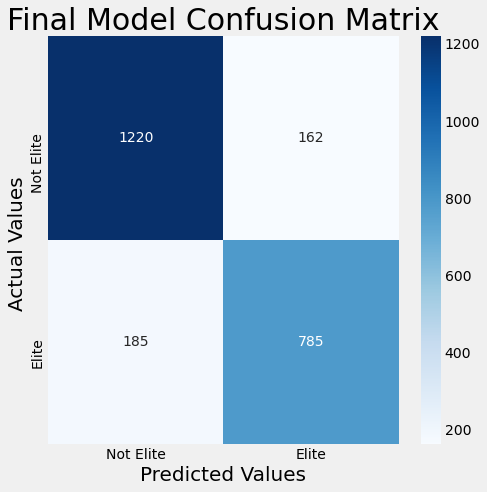

In [70]:
#checking confusino matrix to visualize my final model's predictions
dt2_matrix = confusion_matrix(y_test, dt2_y_pred)

fig, ax = plt.subplots(figsize=(7,7))

ax = sns.heatmap(dt2_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Final Model Confusion Matrix', fontsize = 30);
ax.set_xlabel('Predicted Values',fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize=20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Elite','Elite'])
ax.yaxis.set_ticklabels(['Not Elite','Elite'])


## Display the visualization of the Confusion Matrix.
plt.show()

### Final Model Evaluation:
- <b> Precision: </b> This Model correctly picks whether a rental will have an overall AirBnb rating between 4.9-5.0, 83% of the time.
    - This is 33% better than random guessing. (50% chance of getting it correct)
    - The Final Model is also a 6% improvement over the baseline model.
- <b>F1 Score: </b> While other models had slightly better F1 Scores, Decision Tree 2's F1 Score is only slightly worse. The F1 Score indicates that Precision is reasonably balanced with Recall, so I don't need to worry about this being an unbalanced and un-usable model. Therefore I'm fine choosing a model with a lower F1 in order to get more precsision.
- <b> ROC AUC Score: </b> Shows the True Positive Rate vs. the False Postive Rate. Some models had slightly higher scores than my Final Model, but again, it was very slight.
- <b> Cross Validation Score: </b> This model performs fairly well on data that it was not trained on and is comporable to the Cross Validation Scores of the other models. 

### Final Model Plot

In [71]:
#getting the column names
X.columns

Index(['price_280+_True', 'accuracy_5_True', 'cleanliness_5_True',
       'checkin_5_True', 'location_5_True', 'value_5_True',
       'communication_5_True', 'entire_home_True', 'bedrooms_2+_True',
       'bookings_above_avg_True', 'instant_bookable_True', 'capacity_5+_True',
       'host_listings_5-_True', 'superhost_True', 'host_response_100_True',
       'response_within_hour_True'],
      dtype='object')

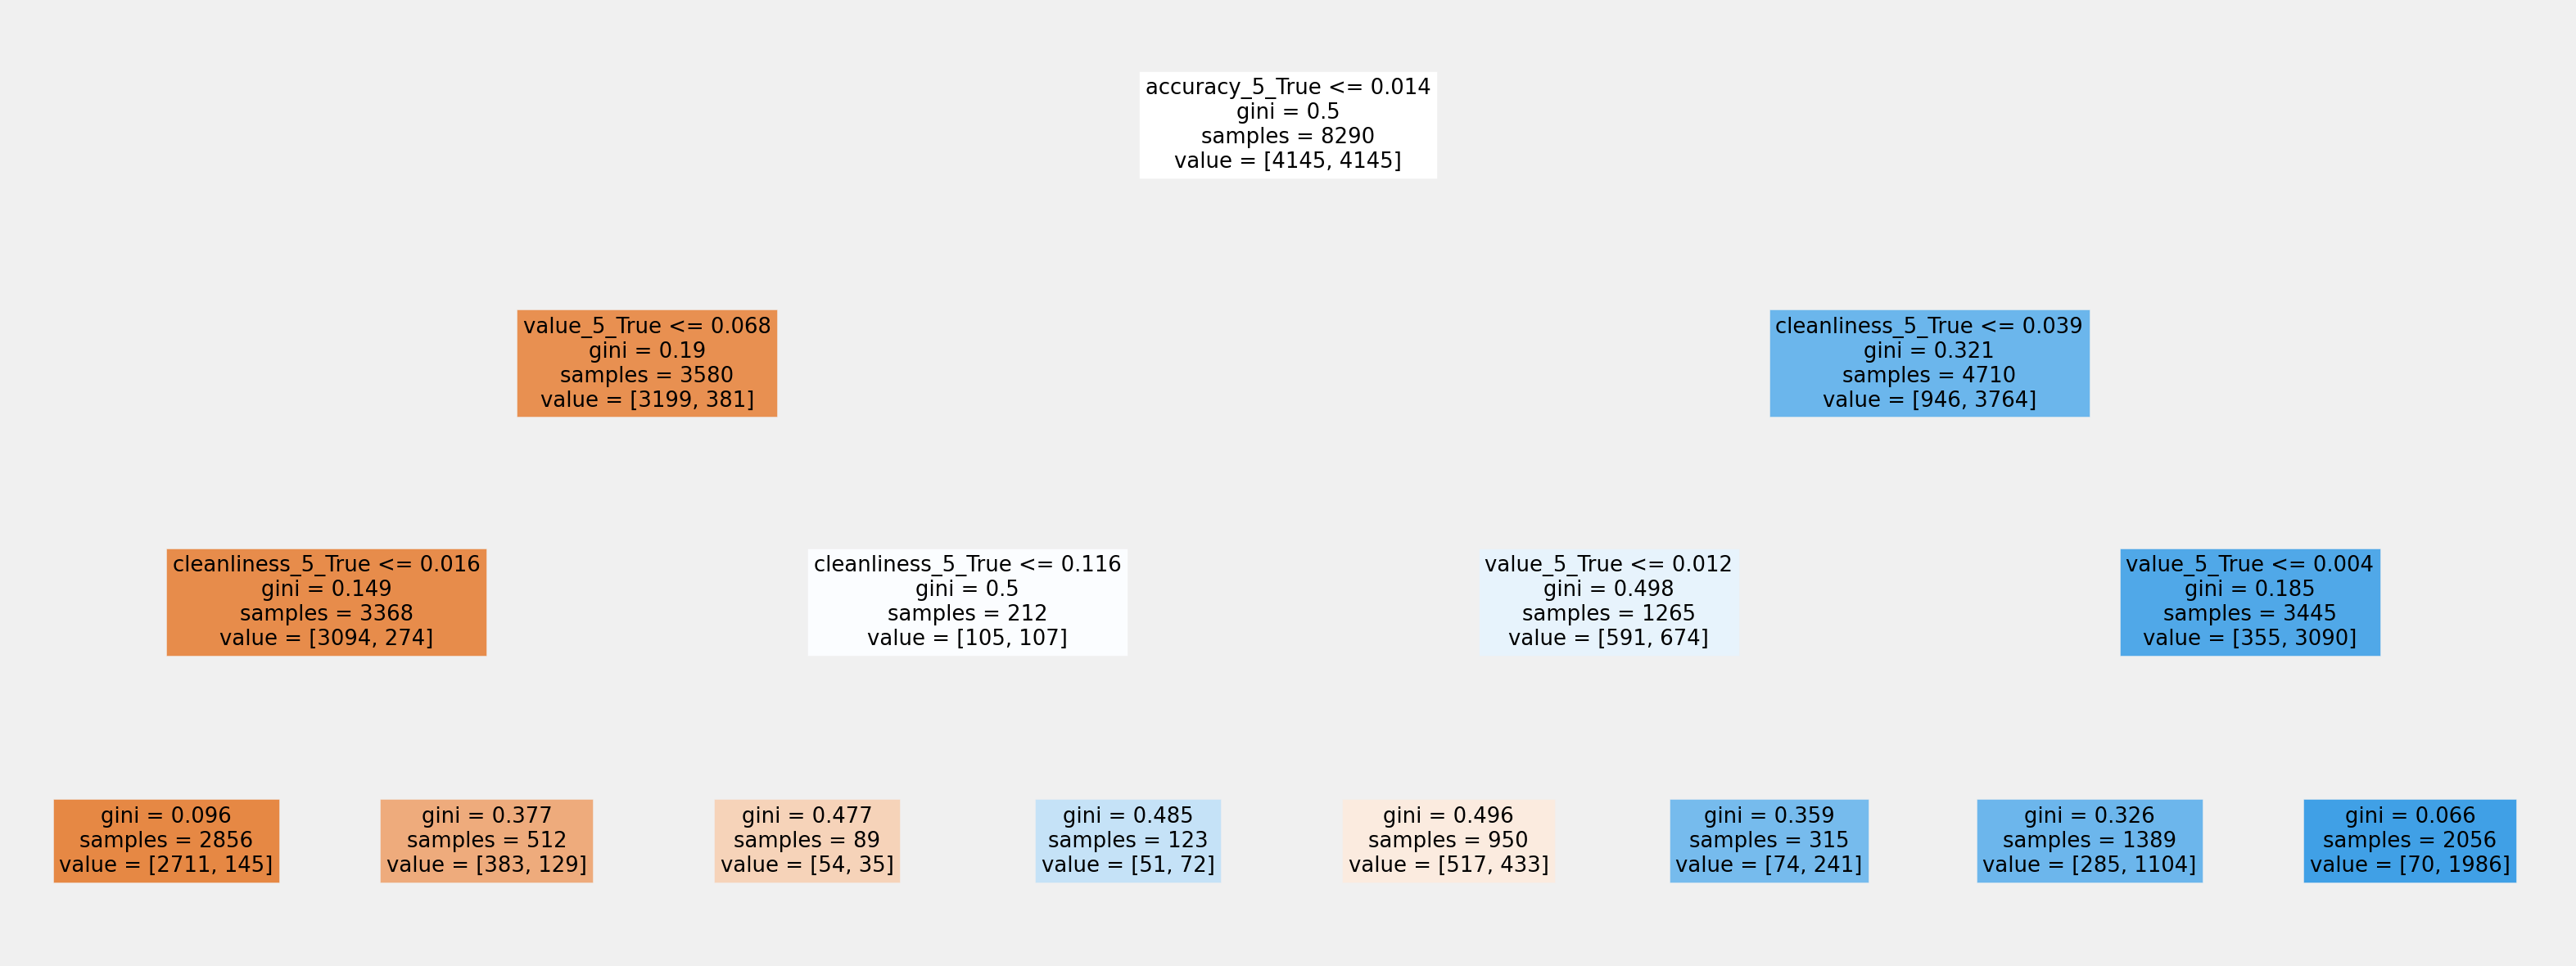

In [72]:
#plotting a visualization of the decision tree classification process
fig = plt.figure(figsize=(50,20))
tree.plot_tree(dt2,
              feature_names=X.columns,
              filled=True);

### How to use This Model going forward:
- OPM can take the data from new clients and run the model to determine whether they are performing at 5-Star level or not.
- If they are, they should be able to obtain Superhost status and OPM can focus on helping them <b> maintain </b> everything that they are doing right.
- If they are not a 5-Star rental unit, OPM can give them advice and help get them to 5-Star status.

<b>Caveats: </b>
- No model is perfect, and this one certainly isn't.
- This model relies on review scores from the 6 review categories. <b>If you don't have that data, the model does not perform reliably enough to be used.</b>
- That said, it can be reliably trusted as only 162 records from the test set of 2,352 were incorrectly labeled as being Elite Units when they were, in fact, not. (We aren't worried about the ones that were predicted to be not Elite incorrectly)


## <b>Feature Evaluation:</b>
- Now that we have determined that the model is reasonably reliable and acceptable to use for predicting whether or not an AirBnb unit is an Elite Unit or not, we will use the model to tell us which features have the largest impact on making that classification.

### Feature Importance
- Finding out which features had the most impact on the classification of Elite Units.

In [73]:
#getting a list of all feature names
feature_names = list(X)

#getting an array with the importance level of each feature
dt2_importance = dt2.feature_importances_

In [76]:
#Turning feature names and importances into a dataframe for analysis
feature_importance_df = pd.DataFrame(dt2_importance, feature_names)
feature_importance_df= feature_importance_df.reset_index()
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df.head(4)

,Feature,Importance
1,accuracy_5_True,0.812783
2,cleanliness_5_True,0.118387
5,value_5_True,0.068830
0,price_280+_True,0.000000


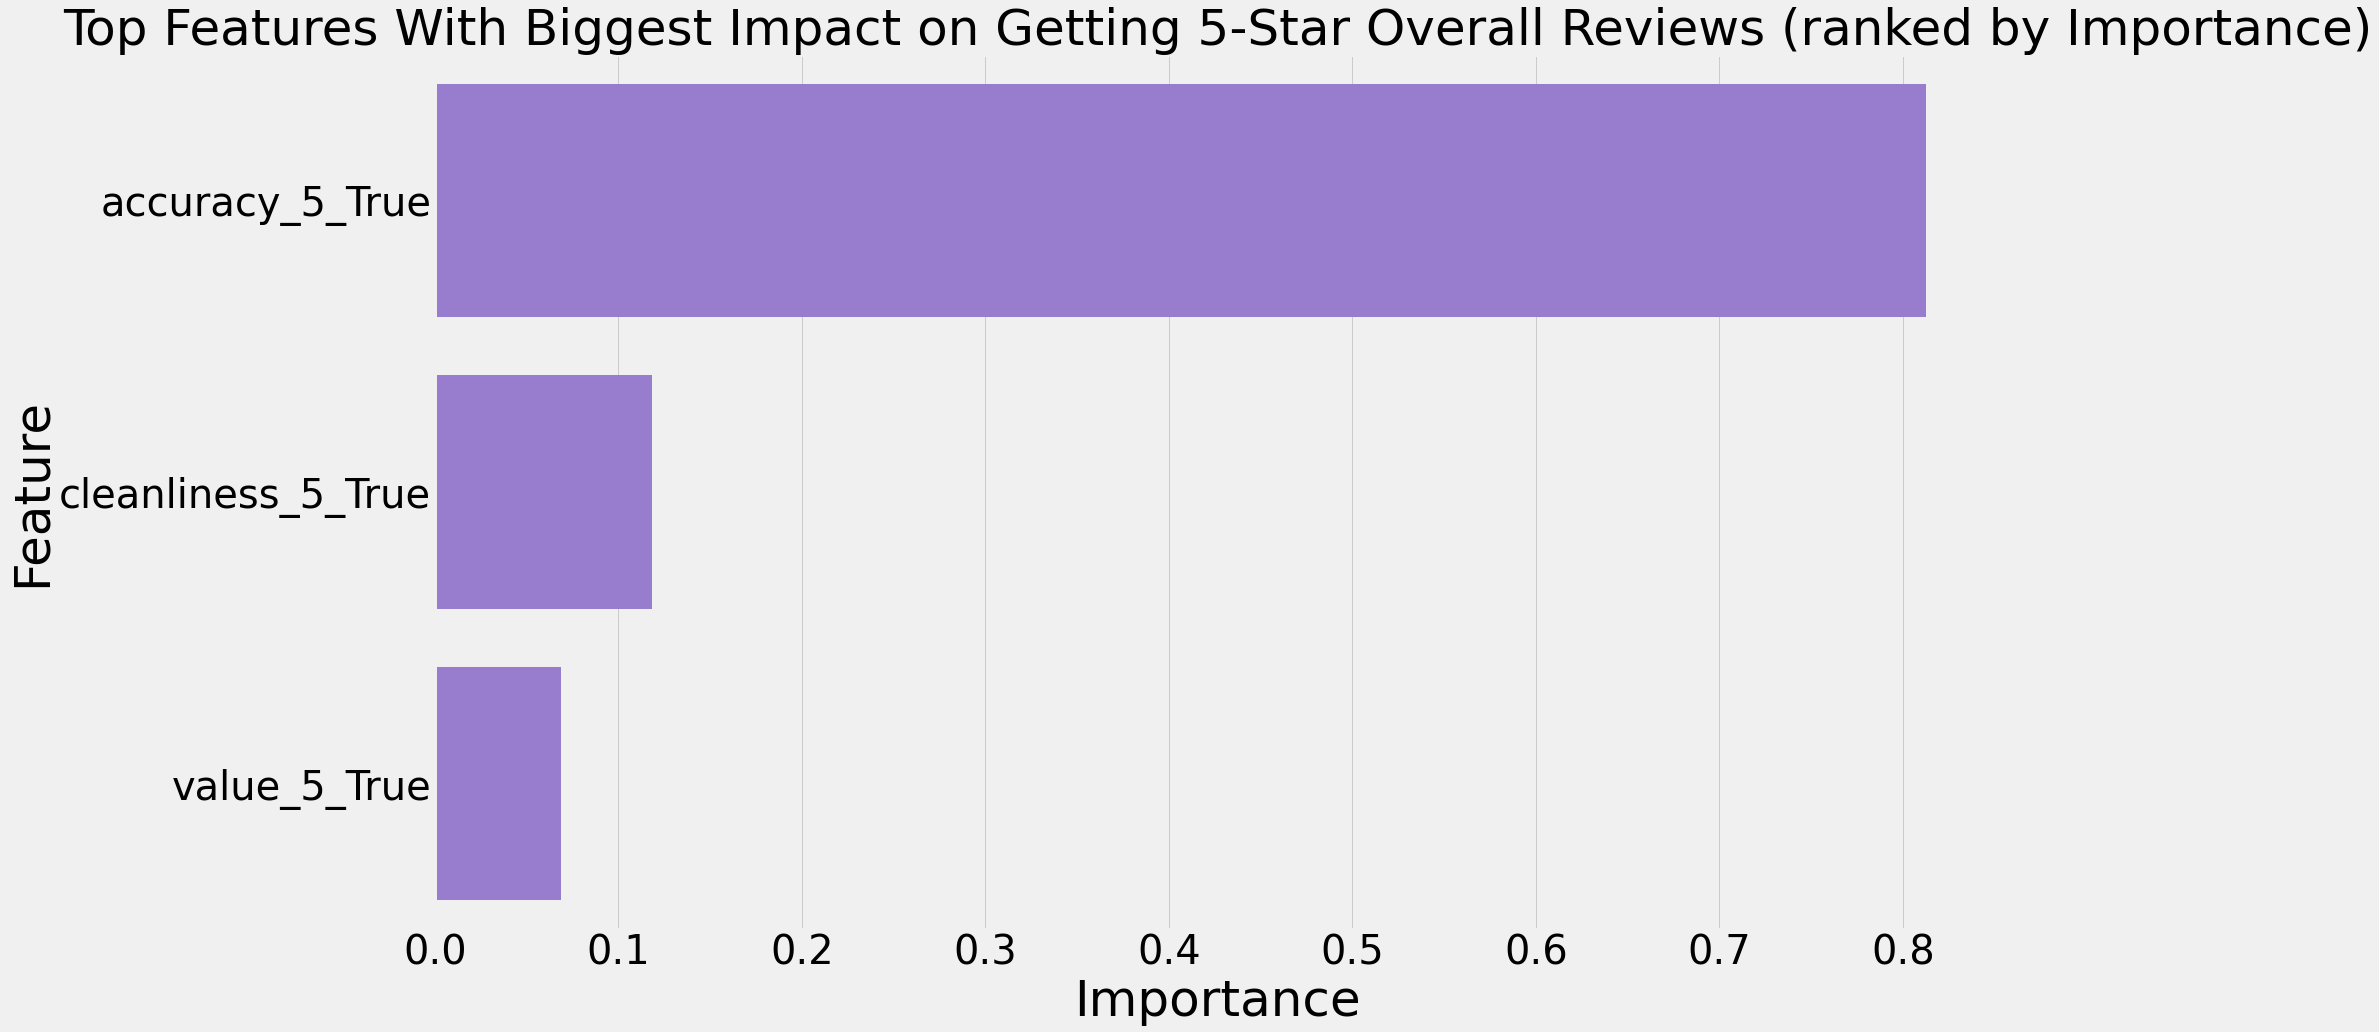

In [79]:
# plot feature importance
fig, ax = plt.subplots(figsize=(25,15))
p = sns.barplot(data=feature_importance_df.head(3), x='Importance', y='Feature', color ='mediumpurple' );
p.set_xlabel("Importance", fontsize = 50)

p.set_ylabel("Feature", fontsize = 50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

p.set_title("Top Features With Biggest Impact on Getting 5-Star Overall Reviews (ranked by Importance)",
            fontsize = 50)


plt.show();

#### Analysis: 
- <b>Accuracy is by far the most important feature</b>
- It is <b>7 Times more important</b> than the next features.
- <b> Cleanliness and Value are also important, but not nearly as much as Accuracy</b>

#### Features with Little Impact on Target:
- All of the other Features show 0 importance in determining our Target status. However, I suspect that they play into the Accuracy, Value, etc, and will investigate that later.

## <b>Analysis of Top Features</b>

### Review Metric DF (or Feature Analysis DF)

In [80]:
#creating a copy of the dataframe for feature analysis
feature_analysis_df = df.copy()

In [83]:
#dropping redundant and/or unneccesary features
feature_analysis_df.drop(['review_scores_rating', 'review_scores_cleanliness', 'review_scores_value',
                    'review_scores_accuracy', 'review_scores_communication', 'review_scores_location',
                    'review_scores_checkin', 'accommodates', 'price', 'calculated_host_listings_count',
                    'availability_30', 'availability_90', 'availability_365', 'host_response_rate',
                    'host_id', 'bedrooms', 'beds', 'availability_30_rate', 'availability_90_rate',
                     'host_is_superhost', 'amenities', 'property_type',
                    ], axis=1, inplace=True)

KeyError: "['review_scores_rating' 'review_scores_cleanliness' 'review_scores_value'\n 'review_scores_accuracy' 'review_scores_communication'\n 'review_scores_location' 'review_scores_checkin' 'accommodates' 'price'\n 'calculated_host_listings_count' 'availability_30' 'availability_90'\n 'availability_365' 'host_response_rate' 'host_id' 'bedrooms' 'beds'\n 'availability_30_rate' 'availability_90_rate' 'host_is_superhost'\n 'amenities' 'property_type'] not found in axis"

In [82]:
#changing display option so that it displays floats to 2 decimal places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Function get_stats( )

In [84]:
def get_stats(df):
    
    """Takes the wide-form output of a groupby operation and transposes it as a long-form table, while
    also adding a column "delta" which calculates the difference between the True value and the False
    value for each Metric."""
    
    df_transposed = df.transpose()
    df_transposed = df_transposed.reset_index()
    df_transposed.rename(columns={'index': 'Metric'}, inplace=True)
    stats_df = df_transposed
    delta = stats_df.apply(lambda x: x[1.0] - x[0.0], axis=1)
    stats_df['delta'] = delta
         
    return stats_df. sort_values('delta', ascending=False)

## Top Features 

In [85]:
#creating a variation of analysis_df sorted by calculated_host_listings_count, to make it easier to plot visualizations.
host_listings = analysis_df.sort_values('calculated_host_listings_count', ascending=True)

In [86]:
#creating another variation that splits into two datasets. Superhosts and non-Superhosts.
superhost_df = host_listings[host_listings['superhost'] == True]
not_superhost_df = host_listings[host_listings['superhost'] == False]

In [87]:
#creating another variation that splits into two datasets. Elite units and non-Elite units.
elite_df = host_listings[host_listings['elite'] == True]
not_elite_df = host_listings[host_listings['elite'] == False]

### <b> Top Feature #1: Accuracy </b>

Accuracy is by far the most important feature in my model. Let's look at the relationship between Accuracy Score and Overall Rating.

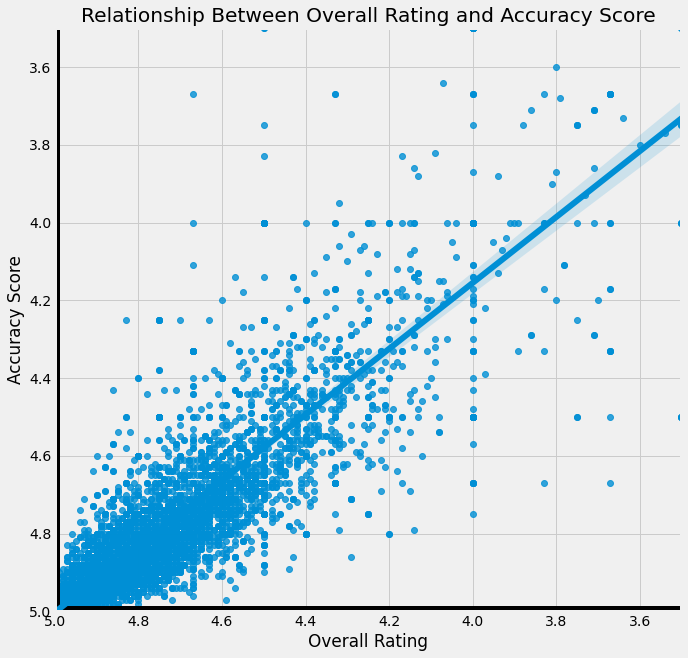

In [88]:
#creating a scatterplot to analyze the relationship between Accuracy Score and Overall Rating
fig, ax = plt.subplots(figsize=(10,10))
p = ax.invert_xaxis()
p = ax.invert_yaxis()

ax.axvline(5, color='black', linewidth=(10))
ax.axhline(5, color='black', linewidth=(10))


p =sns.regplot('review_scores_rating','review_scores_accuracy', data=df);

ax.set_xlabel('Overall Rating')
ax.set_ylabel('Accuracy Score')

ax.set_title('Relationship Between Overall Rating and Accuracy Score')

ax.set_xlim(5.0, 3.5)
ax.set_ylim(5.0, 3.5);


Analysis:
- As I suspected. There is a linear relationship between the two. Whatever the Accuracy Score is, the Overall Rating will likely be very similar as there is a nearly direct linear relationship.
- <b>Therefore, focusing on Accuracy is the best way to get 5 Star Reviews.</b>

In [89]:
#calling stats on accuracy scores.
df['review_scores_accuracy'].describe()

count   9385.000
mean       4.797
std        0.374
min        1.000
25%        4.760
50%        4.900
75%        5.000
max        5.000
Name: review_scores_accuracy, dtype: float64

Analysis:
- While the mean is 4.79, the median is 4.9, which means that the split between elite accuracy and non-elite accuracy should be near 50%

In [90]:
#checking to verify my analysis
df['accuracy_5'].value_counts()

True     4764
False    4644
Name: accuracy_5, dtype: int64

In [96]:
accuracy_metrics = feature_analysis_df.groupby('accuracy_5').mean()
accuracy_stats = get_stats(accuracy_metrics)
accuracy_stats

accuracy_5,Metric,False,True,delta
9,elite,0.086,0.731,0.645
12,cleanliness_5,0.170,0.693,0.523
16,communication_5,0.423,0.895,0.472
15,value_5,0.053,0.475,0.422
13,checkin_5,0.486,0.892,0.405
14,location_5,0.404,0.754,0.349
8,superhost,0.358,0.622,0.264
1,host_listings_5-,0.523,0.750,0.227
6,bookings_above_avg,0.453,0.562,0.108
5,booked_rate_90,0.489,0.573,0.084


#### Analysis: 
- This matches what I found in my research. <b>The most important aspect of renting an AirBnb is that the listing is accurate, to ensure that Guest expectations are met.</b>
- Nearly all units that have an accuracy score of 4.9-5.0 also scored high in the other 5 review metrics.
- Nearly all units that did not have an accuracy score of 5 did not score highly on others as well.
- <b>Significantly more likely to be Elite Units and/or SuperHosts</b>
- More likely to have a 100% Response Rate
- <b>73% of units that scored 4.9-5.0 on accuracy were in our target 5-star range.</b>
- They are less likely to use the instant book feature, although 40% of units with 5.0 accuracy do each.

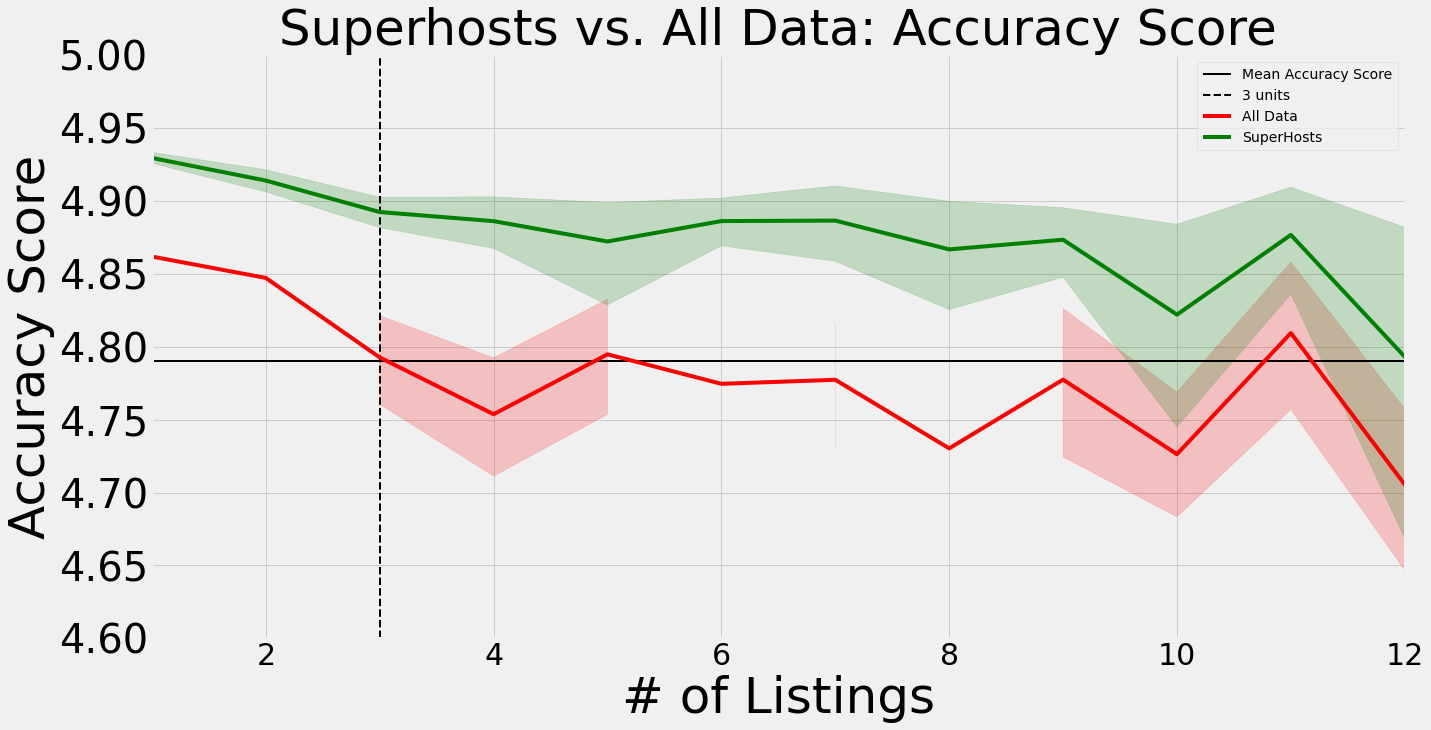

In [110]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.79, color='black', linewidth=(2), label='Mean Accuracy Score')
#ax.axvline(12, ls='--', color='black', linewidth=(2), label='12 units')
ax.axvline(3, ls='--', color='black', linewidth=(2), label='3 units')


ax.set_xlim(1, 12)
ax.set_ylim(4.6, 5.0)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_accuracy',
                  color ='red' , label='All Data');

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_accuracy',
                  color ='green' , label='SuperHosts');




p.set_ylabel("Accuracy Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)


p.set_title("Superhosts vs. All Data: Accuracy Score", fontsize = 50)

plt.show();

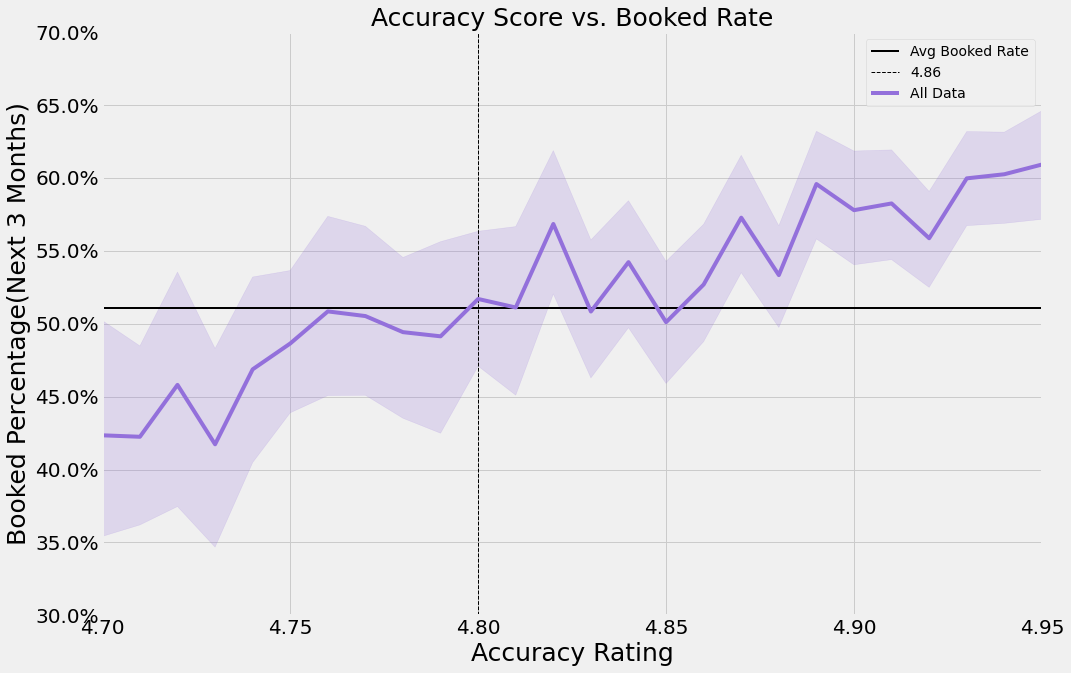

In [118]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(.511,  color='black', linewidth=(2), label='Avg Booked Rate')
ax.axvline(4.8 , ls='--', color='black', linewidth=(1), label='4.86')


p = sns.lineplot(data=host_listings, x='review_scores_accuracy', y='booked_rate_90',
                color ='mediumpurple', label='All Data' );


p.set_xlim(4.7,4.95)
p.set_ylim(.3, .7)

p.set_ylabel("Booked Percentage(Next 3 Months)", fontsize = 25)

p.set_xlabel("Accuracy Rating", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Accuracy Score vs. Booked Rate", fontsize = 25)


plt.show();

Analysis:
- <b>There is a positive correlation between Accuracy Rating and Booked Rate.</b>
- Starting at 4.8 Average Accuracy, units consistantly book at a higher rate that all other units.
- Also much more certainty in the values as they stay closer to the mean.

### <b>Top Feature #2: Value</b>

In [ ]:
df['review_scores_value'].describe()

In [ ]:
value_metrics = feature_analysis_df.groupby('value_5').mean()
value_stats = get_stats(value_metrics)
value_stats

#### Analysis:
- Units with a Value Score of 4.9+ are significantly more likely to have higher scores on all review metrics.
- They are also more likely to be a 5-Star Unit, with <b>87% of units with high value being 5-Star Units.</b>

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.7, color='black', linewidth=(2), label='Mean Value Score')
ax.axvline(11, ls='--', color='black', linewidth=(2), label='11 units')


ax.set_xlim(1, 15)
ax.set_ylim(4.4, 5.0)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_value',
                  color ='orange' , label='All Data');

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_value',
                  color ='green' , label='SuperHosts');

p.set_ylabel("Value Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)


p.set_title( "Value Score vs. # of listings", fontsize = 50)

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(.511, ls='--', color='black', linewidth=(2), label='Avg Booked Rate')
ax.axvline(4.7 ,ls='--', color='red', linewidth=(1), label='Mean Value Score')
ax.axvline(4.76 ,ls='--', color='black', linewidth=(1), label='')


p = sns.lineplot(data=host_listings, x='review_scores_value', y='booked_rate_90',
                 color ='orange')


p.set_xlim(4.6,4.95)
p.set_ylim(.3, .7)

p.set_ylabel("Booked Percentage(Next 3 Months)", fontsize = 25)

p.set_xlabel("Value Score", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Value Score vs. Booked Rate", fontsize = 25)


plt.show();

- Higher Value Scores translate into higher booked rates. 
- <b> There is no real differnce between being a Superhost or Five-Star Unit vs. normal here. All benefit equally from an increase in value.</b>
- Value stays above average booking rate with positive trend starting at 4.76.
- <b>Value increases booking rate more than Accuracy does.</b>

### <b>Top Feature #3: Cleanliness</b>

In [ ]:
df['review_scores_cleanliness'].describe()

In [ ]:
cleanliness_metrics = feature_analysis_df.groupby('cleanliness_5').mean()
cleanliness_stats = get_stats(cleanliness_metrics)
cleanliness_stats

#### Analysis:
- More likely to score higher in all review metrics.
- 75% of Cleanliness 5.0 units have 5-Star Status.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.86, color='black', linewidth=(2), label='Median Cleanliness')

ax.set_xlim(1, 15)
ax.set_ylim(4.4, 5.0)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_cleanliness',
                color ='olive' , label='All Listings');

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_cleanliness',
                 color ='green', label='SuperHosts' );


p.set_ylabel("Cleanliness Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)


p.set_title( "Cleanliness Score vs. # of listings", fontsize = 50)

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(.511, ls='--', color='black', linewidth=(2), label='Avg Booked Rate')
ax.axvline(4.86 ,ls='--', color='red', linewidth=(1), label='Median Cleanliness Score')


p = sns.lineplot(data=host_listings, x='review_scores_cleanliness', y='booked_rate_90',
                color ='olive')

p.set_xlim(4.45,4.95)
p.set_ylim(.3, .7)

p.set_ylabel("Booked Percentage(Next 3 Months)", fontsize = 25)

p.set_xlabel("Cleanliness Score", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Cleanliness Score vs. Booked Rate", fontsize = 25)


plt.show();

### <b> Top Feature #4: Communication </b>

In [ ]:
df['review_scores_communication'].describe()

In [ ]:
communication_metrics = feature_analysis_df.groupby('communication_5').mean()
communication_stats = get_stats(communication_metrics)
communication_stats.sort_values(True, ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.85, ls='--', color='black', linewidth=(2), label='Mean Commumnication')

ax.set_xlim(1, 15)
ax.set_ylim(4.6, 5.0)
p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_communication',
                 color ='goldenrod', label='All Data' );

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_communication',
                color ='green', label='SuperHosts');


p.set_ylabel("Communication Score", fontsize = 50)

p.set_xlabel("# of Listings", fontsize = 50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=40)


p.set_title( "Communication Score vs. # of listings", fontsize = 50)

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(.511, ls='--', color='black', linewidth=(2), label='Avg Booked Rate')

p = sns.lineplot(data=host_listings, x='review_scores_communication', y='booked_rate_90',
                 color ='goldenrod')

p.set_xlim(4.6,4.95)
p.set_ylim(.3, .7)

p.set_ylabel("Booked Percentage(Next 3 Months)", fontsize = 25)

p.set_xlabel("Communication Score", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Communication Score vs. Booked Rate", fontsize = 25)


plt.show();

## <b>Questions Answered</b>

### Is there a significant advantage to being a Superhost? (is it worth all the effort to get this status and maintain it?)

In [ ]:
superhost_metrics = feature_analysis_df.groupby('superhost').mean()
superhost_stats = get_stats(superhost_metrics)
superhost_stats

- <b>YES!</b>
- <b>Superhosts are 21% more likely to be Elite Units than non-superhosts.</b>
- <u>Superhosts and the 4 Important Features:</u>
- 81% of Superhosts have at least 4.9 Communication Score. (30% better than non-superhosts)
- 64% of Superhosts have at least 4.9 Accuracy Score. (26% better than non-superhosts)
- Superhosts have similar Value Scores to Non-Superhosts.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axvline(8 , ls='--', color='black', linewidth=(2), label='8')
ax.axhline(.511, color='black', linewidth=(2), label='Average (mean) booking rate')

p = sns.lineplot(data=superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                 color ='green', label = 'Superhost' );

p = sns.lineplot(data=not_superhost_df,x='calculated_host_listings_count', y='booked_rate_90',
                  color ='tomato', label = 'Not A Superhost' );



p.set_xlim(2,15)
p.set_ylim(.2,.9)

p.set_ylabel("Booked Rate (3 Months Out)", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Superhosts vs Not Superhosts", fontsize = 25)

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.8, color='black', linewidth=(2), label='4.8 Score')
ax.axvline(9, ls='--', color='black', linewidth=(2)),

p = sns.lineplot(data=superhost_df, x='calculated_host_listings_count', y='review_scores_rating',
                color ='green', label='SuperHosts' );

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 color ='tomato', label='All Data' );
p.set_xlim(1,14)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 30)

p.set_xlabel("# of units owned", fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


p.set_title( "Overall Rating vs. Number of Units Owned", fontsize = 40)

plt.show();

#### YES, Superhosts perform better
- Superhosts are better able to to handle higher numbers of listings.
- Most Superhosts can have 10 listings before it affects their 3 Month Booking Rate.
- Most Superhosts are also able to have 10 listings before their Overall Rating Drops below 4.8.

### Is there a significant advantage to getting 5-Star overall Rating?

YES!

In [ ]:
elite_metrics = feature_analysis_df.groupby('elite').mean()
elite_stats = get_stats(elite_metrics)
elite_stats

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axvline(8 , ls='--', color='blue', linewidth=(2), label='8')
ax.axhline(.511, color='black', linewidth=(2), label='Average (mean) booking rate')

p = sns.lineplot(data=elite_df,x='calculated_host_listings_count', y='booked_rate_90',
                  color ='cornflowerblue', label = 'Elite Units' );

p = sns.lineplot(data=host_listings,x='calculated_host_listings_count', y='booked_rate_90',
                 color ='tomato', label = 'All Data' );

p.set_xlim(2,15)
p.set_ylim(.2,.75)

p.set_ylabel("Booked Rate (3 Months Out)", fontsize = 25)

p.set_xlabel("# of Listings", fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

p.set_title( "Elite Units", fontsize = 25)

plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.axhline(4.8, ls='--', color='black', linewidth=(2), label='4.8 Score')

p = sns.lineplot(data=elite_df, x='calculated_host_listings_count', y='review_scores_rating',
                  color ='cornflowerblue', label='Elite Units' );

p = sns.lineplot(data=host_listings, x='calculated_host_listings_count', y='review_scores_rating',
                 color ='red', label='All Data' );



p.set_xlim(1,14)
p.set_ylim(4.5, 5)


p.set_ylabel("Score", fontsize = 30)

p.set_xlabel("# of units owned", fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


p.set_title( "Overall Rating vs. Number of Units Owned", fontsize = 40)


plt.show();

### Analysis: 
- While Elite Units perform slightly better in booking rate, <b>being an Elite unit is the best solution to the negative trend between Overall Rating and Number of Units.</b>
- <b> As long as you can keep your units performing at the highest levels, there is no limit on how many units you list.</b>
- The catch is of course, learning how many that you can manage and keep at that level. This is an area where OPMs service will be invaluable!
- Offer resources to help Hosts. (Preferrred cleaners, stagers, contractors for emergencies. Maybe even a dedicated customer service phone number)



- Most Notably, <b>Elite Units have the biggest increase in the Top Features: accuracy, cleanliness, value, and communication.</b>
- <b>This shows that our Target does a good job of capturing the features that lead to more 5 Star Overall Reviews!</b>
- Elite Overall units score much higher in review metrics. This makes sense because they should have to score high in all of them to get a high overall score (even though it is a seperate metric in terms of AirBnb).
- they are also more likely to be a superhost, and more likely to have less than 5 listings.
- They are less likely to have high Capacity, or use Instant Book feature, but the differences aren't major.

Elite Units stats:
- <b>90% have 4.9-5.0 Average Scores in Communication, Check-in, and Accuracy.</b>
- 79% have perfect response rate.
- 76% have less than 5 listings
- 64% are Superhosts
- <b> 55% of have a 4.9-5.0 Average Value Score </b>

## <b><u>Recommendations</b></u>

### <b> The Focus of your AirBnb Consulting Service should be Improving and Maintaining Accuracy in everything that Hosts do.</b>

- Accuracy Score has a nearly direct linear relationship with Overall Score. <b>Accuracy Score is  by far  the most important feature with effect on Overall Rating. </b>
- Leverage your experience in the rental market to ensure that host listings are accurate and not overly embellished.
- Be an "outside party" that understands what Airbnb guests need and want to see in listings.

<b>This will lead to more Elite Units</b>
- Elite Units should be eligible for becoming SuperHosts, and maintaining that status. (preferred listings, badges, “stamp of approval” from AirBnb.)

- <b>OPM should study the listings of units of units which consistently get 5.0 accuracy ratings to learn how to properly assess rental units and list them accurately. </b>
- This is the key value add that they can provide to clients.
- It's fairly easy to see that you need to have an accurate listing to perform well (many blogs and websites cite this). However, it's hard to say what practical steps a client can do to list their particular unit(s) properly. <b>OPM should market themselves as Accuracy Experts.</b>

Accuracy has linear relationships with Overall Rating, Value, Communication, and Cleanliness scores. <b>Performing well in Accuracy will have a positive result in ALL important features that increase the number of 5 star overall reviews.</b>

### <b> Provide Resources to Help Hosts Set Guest Expectations, and Then Exceed Them!</b>
- accurate listing
- explanation of airbnb's skewed review system.
- do this without being deceptive or cooercive.

- It doesn't matter if Hosts have all the metrics and analysis to <b>know</b> that their unit deserves 5-star reviews. Their fate is in the hands of the reviewers. If they really care about getting 5 star reviews (and they should since they are critical to success on AirBnb), they need to explain this to their guests. 

- It is also important to do this without begging, or deceptively cooercing your guests.


- There are many great blog posts and websites dedicated to this. The best solution that I found was this one from https://medium.com/@campbellandia/how-to-avoid-the-dreaded-4-star-review-a-guide-for-airbnb-hosts-cdf482d083fe (accessed 6/21/22)

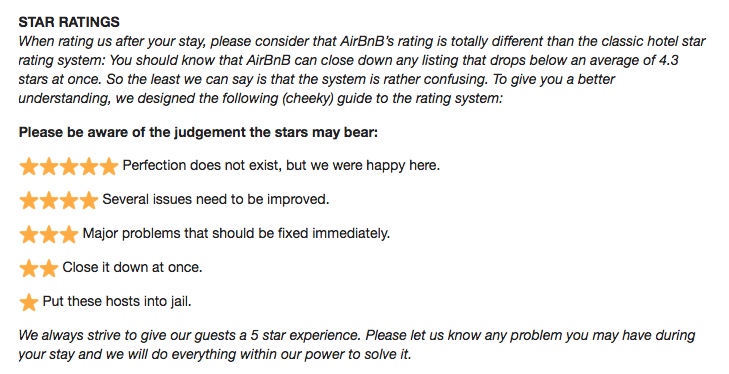

### Bridge the Gap Between Hosts' Self-Managing their Rentals, and OPM Fully Managing Rentals

- There is a general downward trend in overall rating as the number of units owned increases.
- Hosts with just 1 unit can likely keep everything at a very high level, and shouldn't need much help.
- Starting with 2 units, there is a negative trend in regards to most review categories, to the extent that most Hosts need some type of assistance
- If Hosts can obtain and maintain SuperHost status, they are able to handle more units on their own, usually up to 8.
- Also, I recommend that OPM offer services that help hosts to manage units once they get close to that threshold.
-- ie, prefered cleaning services, help with accurate listings, etc.

<b>Target your consulting services at hosts with 2-8 rentals.</b>
- If they have more than 8, try to transition them into your core business of property management.

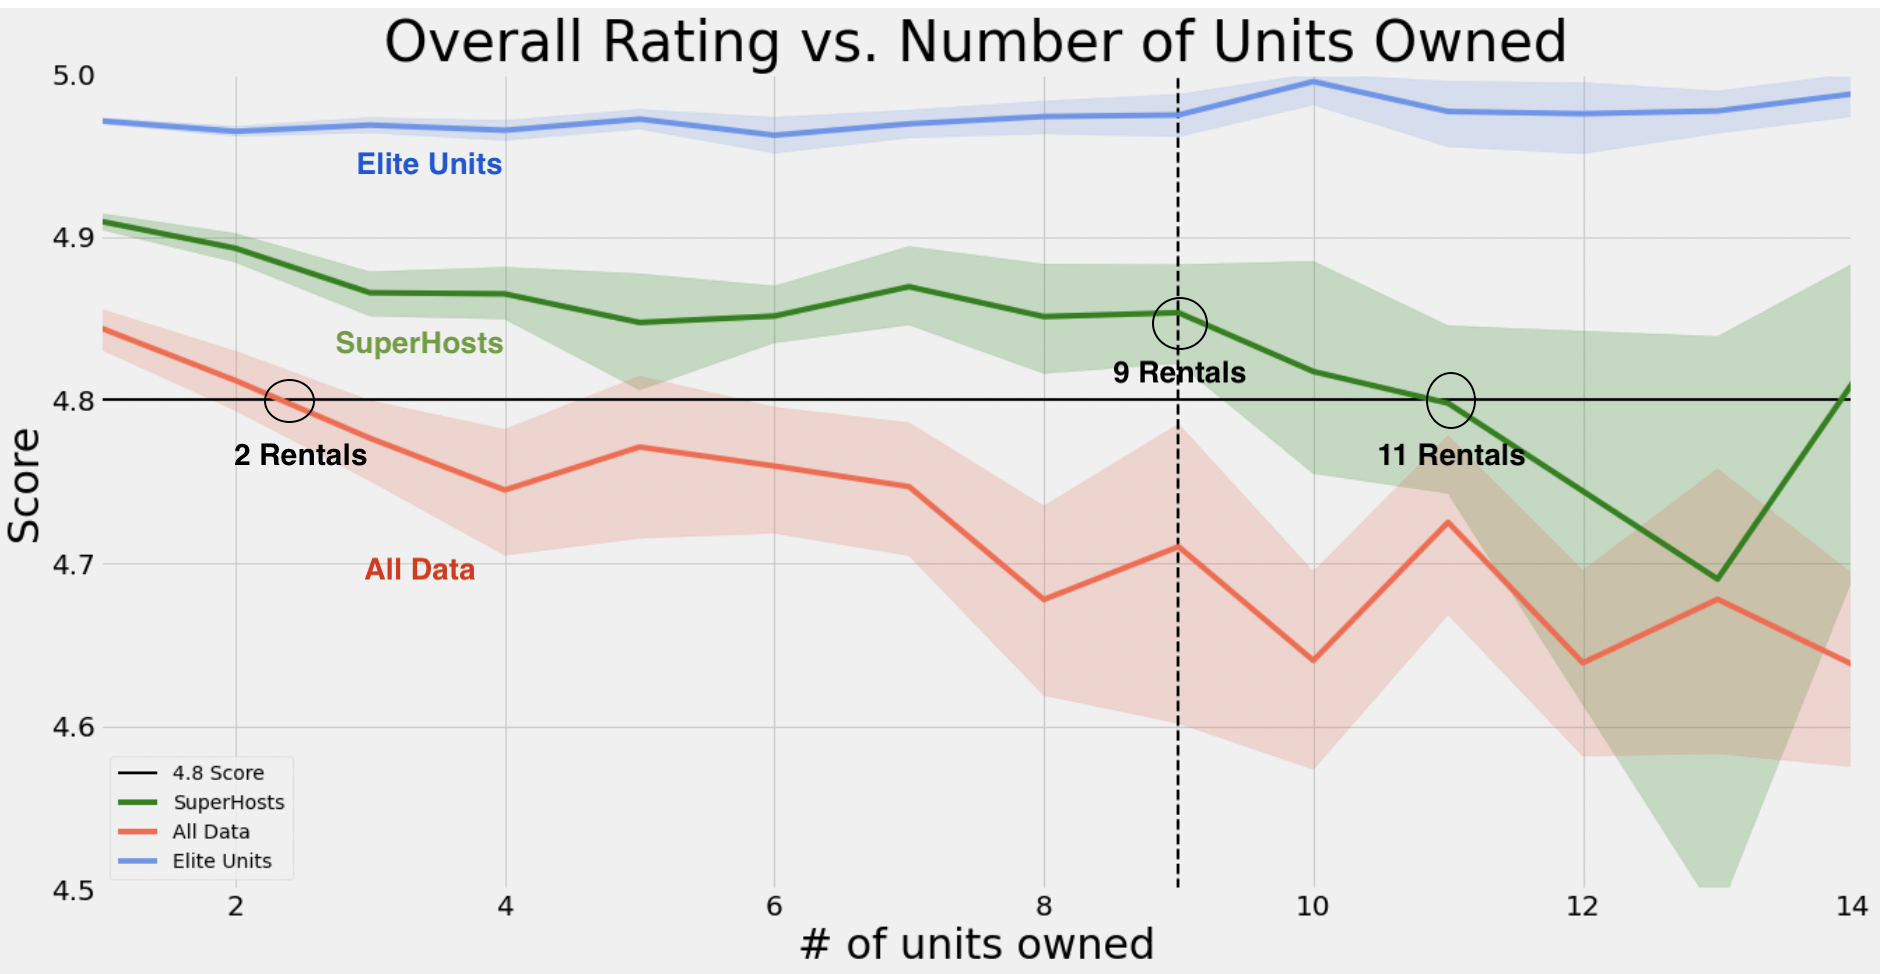

- Non Superhosts will struggle with 2 or more properties.
- Superhosts can handle closer to 10.
- Offer Services to help these Clients that bridge the gap between Host-managed and OPM managed.
- <b>Give them a taste while putting them on a path toward being fully OPM managed.</b>
- You could also market yourself to people who haven't become Airbnb hosts yet, but want to learn how.


## Conclusion

In my analysis of Airbnb rentals in San Diego California, I found that having a high overall rating (4.9-5.0), as well as having SuperHost status, were both beneficial to success on the platform.
- I also found that Accuracy was the biggest factor in getting a high overall rating, with a nearly 1 to 1 linear relationship.
- Other important features were Value, Cleanliness, & Communication.

<b> Areas for OPM to Capitalize on:</b>
- <b>Accuracy:</b> By providing a listing service which assesses client's rental units and lists their units in such a way as to maximize the accuracy. 
- <b>Bridging the Gap between Owner-Managed and OPM Managed:</b> OPM can provide a la carte services which help owners who wish to keep managing their own properties, but can't handle doing so at the highest quality levels. <b> This is also beneficial to OPM in creating a pipeline of potential fully managed units as hosts take on more properties that they can manage. </b>
-- This can be structured in such a way to incentivize clients transitioning to OPMs full management service at certain thresholds (ie, 10 properties, etc).
- <b>Communication: </b>OPM can train hosts on what they can do to set expectations properly, and then exceed them with service (AirBnb's goal). This is done through how they communicate and how often they do it.

## Further Work

### Use Natural Language Processing to analyze Amenities.
- This DataSet includes <b>amenities, which would be very benefical to both the model and industry analysis.</b> 
- However, they are all in string format and getting them into a useful format will be time intensive. 
- Get them into a format where they can be one-hot encoded and fed into the model.

### Increase the scope of this model.
- Incorporate data from the rest of California, and then the rest of the US.